# <p style='text-align: center;'> Attention Mechanism in Deep Learning </p>

## Introduction:
A sequence to sequence modelling network should not be used out of the box. It still needs a bit of tuning to squeeze out the best performance out there to meet expectations. One technique which have proven to be useful in the past in sequence to sequence modelling applications. Hence **Attention mechanism** comes into picture.

## What is Attention?
In psychology, attention is the cognitive process of selectively concentrating on one or a few things while ignoring others.

In other words, A neural network is considered to be an effort to mimic human brain actions in a simplified manner. Attention Mechanism is also an attempt to implement the same action of selectively concentrating on a few relevant things, while ignoring others in deep neural networks. 

Let me explain what this means. Let’s say you are seeing a group photo of your first school. Typically, there will be a group of children sitting across several rows, and the teacher will sit somewhere in between. Now, if anyone asks the question, “How many people are there?”, how will you answer it?

Simply by counting heads, right? You don’t need to consider any other things in the photo. Now, if anyone asks a different question, “Who is the teacher in the photo?”, your brain knows exactly what to do. It will simply start looking for the features of an adult in the photo. The rest of the features will simply be ignored. **This is the ‘Attention’ which our brain is very adept at implementing.**

## How Attention Mechanism was Introduced in Deep Learning
The attention mechanism emerged as an improvement over the encoder decoder-based neural machine translation system in natural language processing (NLP). Later, this mechanism, or its variants, was used in other applications, including computer vision, speech processing, etc.

Before Bahdanau et al proposed the first Attention model in 2015, neural machine translation was based on encoder-decoder RNNs/LSTMs. Both encoder and decoder are stacks of LSTM/RNN units. It works in the two following steps:

1. **The encoder LSTM is used to process the entire input sentence and encode it into a context vector**, which is the last hidden state of the LSTM/RNN. This is expected to be a good summary of the input sentence. All the intermediate states of the encoder are ignored, and the final state id supposed to be the initial hidden state of the decoder

2. **The decoder LSTM or RNN units produce the words in a sentence one after another**

In short, there are two RNNs/LSTMs. One we call the encoder – this reads the input sentence and tries to make sense of it, before summarizing it. It passes the summary (context vector) to the decoder which translates the input sentence by just seeing it.

The main drawback of this approach is evident. If the encoder makes a bad summary, the translation will also be bad. And indeed it has been observed that the encoder creates a bad summary when it tries to understand longer sentences. It is called the **long-range dependency problem of RNN/LSTMs**.

RNNs cannot remember longer sentences and sequences due to the vanishing/exploding gradient problem. It can remember the parts which it has just seen. Even Cho et al (2014), who proposed the encoder-decoder network, demonstrated that **the performance of the encoder-decoder network degrades rapidly as the length of the input sentence increases**.

Although an LSTM is supposed to capture the long-range dependency better than the RNN, it tends to become forgetful in specific cases. Another problem is that there is no way to give more importance to some of the input words compared to others while translating the sentence. 

Now, let’s say, we want to predict the next word in a sentence, and its context is located a few words back. Here’s an example – "**Despite originally being from Uttar Pradesh, as he was brought up in Bengal, he is more comfortable in Bengali**". In these groups of sentences, if we want to predict the word "**Bengali**", the phrase "**brought up**" and "**Bengal**"- these two should be given more weight while predicting it. And although "**Uttar Pradesh**" is another state’s name, it should be "**ignored**".

So is there any way we can keep all the relevant information in the input sentences intact while creating the context vector?

<b> Bahdanau et al (2015) came up with a simple but elegant idea where they suggested that not only can all the input words be taken into account in the context vector, but relative importance should also be given to each one of them.
    
So, whenever the proposed model generates a sentence, it searches for a set of positions in the encoder hidden states where the most relevant information is available. This idea is called "**Attention**".

## Understanding the Attention Mechanism

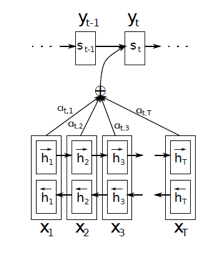

This is the diagram of the Attention model shown in Bahdanau’s paper. The Bidirectional LSTM used here generates a sequence of annotations (h1, h2,….., hTx) for each input sentence. All the vectors h1,h2.., etc., used in their work are basically the concatenation of forward and backward hidden states in the encoder.

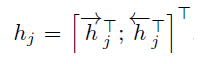

To put it in simple terms, all the vectors h1,h2,h3…., hTx are representations of Tx number of words in the input sentence. In the simple encoder and decoder model, only the last state of the encoder LSTM was used (hTx in this case) as the context vector.

But **Bahdanau et al put** emphasis on embeddings of all the words in the input (represented by hidden states) while creating the context vector. They did this by simply taking a weighted sum of the hidden states.

Now, the question is how should the weights be calculated? Well, the weights are also learned by a feed-forward neural network and I’ve mentioned their mathematical equation below.

The context vector ci for the output word yi is generated using the weighted sum of the annotations:

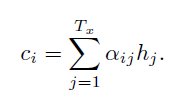

The weights αij are computed by a softmax function given by the following equation:

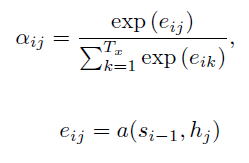

eij is the output score of a feedforward neural network described by the function a that attempts to capture the alignment between input at j and output at i.

Basically, if the encoder produces Tx number of “annotations” (the hidden state vectors) each having dimension d, then the input dimension of the feedforward network is (Tx , 2d) (assuming the previous state of the decoder also has d dimensions and these two vectors are concatenated). This input is multiplied with a matrix Wa of (2d, 1) dimensions (of course followed by addition of the bias term) to get scores eij (having a dimension (Tx , 1)).

On the top of these eij scores, a tan hyperbolic function is applied followed by a softmax to get the normalized alignment scores for output j:

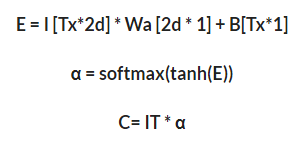

So, α is a (Tx, 1) dimensional vector and its elements are the weights corresponding to each word in the input sentence.

Let α is **[0.2, 0.3, 0.3, 0.2]** and the input sentence is “**I am doing it**”. Here, the context vector corresponding to it will be:

**C=0.2*I”I” + 0.3*I”am”  + 0.3*I”doing” + + 0.2*I”it”**  [Ix is the hidden state corresponding to the word x]



### Note that Bahdanau et al.’s attention mechanism is divided into the step-by-step computations of the alignment scores, the weights, and the context vector:

1. **Alignment scores:** The alignment model takes the encoded hidden states, hj, and the previous decoder output, S(t-1), to compute a score, e(ij), that indicates how well the elements of the input sequence align with the current output at the position, t. The alignment model is represented by a function, a(.), which can be implemented by a feedforward neural network:

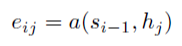

2. **Weights:** The weights, αij (Alpa of i, j), are computed by applying a softmax operation to the previously computed alignment scores:

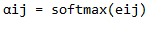 

3. **Context vector:** A unique context vector, Ci, is fed into the decoder at each time step. It is computed by a weighted sum of all, T, encoder hidden states:

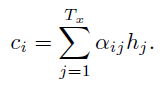 


## Advantages of Attention Mechanism in Deep Learning
1. In the brain, attention mechanisms allow to focus on one part of the input or memory (image, text, etc) while giving less attention to others, thus guiding the process of reasoning. 


2. It allows for **predictive and monotonic alignment**. The predictive alignment enables the model to predict the final alignment position and the monotonic alignment considers only select information. It also combines specific aspects of hard and soft attention.


3. Attention mechanisms have provided and will provide a paradigm shift in machine learning.


## Disadvantages of Attention Mechanism in Deep Learning
1. The disadvantage of the Attention mechanism is that it is a very time consuming and hard to parallelize system.


2. **Computational complexity:** Attention mechanisms can be computationally expensive, particularly in large models, as they require additional computations to compute the attention weights for each input.


3. **Difficulty in training:** Attention mechanisms can be challenging to train, as the attention weights must be learned in addition to the network parameters. This can lead to instability during training and slow convergence.


4. **Over-reliance on attention:** Attention mechanisms can sometimes lead to over-reliance on attention, leading to the network paying attention to the wrong parts of the input.


5. **Interpretability:** Attention mechanisms can be difficult to interpret, as the attention weights can be difficult to understand and provide limited insight into how the network is making its predictions.


6. **Overfitting:** Attention mechanisms can also lead to overfitting, particularly when using them with small datasets, as they allow the network to become highly specialized and therefore overfit to the training data.